# Computational Astrophysics 2021
---
## Eduard Larrañaga

Observatorio Astronómico Nacional\
Facultad de Ciencias\
Universidad Nacional de Colombia

---

## Linear Fit Example 1

### About this notebook

In this worksheet, we consdier the discovery of the Expansion of the Universe by Edwin Hubble as example of a linear fit of experimental data.

---

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
import pandas as pd
%matplotlib inline

In [ ]:
path='' #Define an empty string to use in case of local working

In [ ]:
# Working with google colab needs to mount the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# we define the path to the files
path = '/content/drive/MyDrive/Colab Notebooks/CA2021/09. Regression I/presentation/Linear_Fit01/'

### Edwin Hubble's data

Around the 1920's, Edwin Hubble show that the "nebulae" were external galaxies and not part of our own Galaxy, the Milky Way. In a seminal paper, 

https://ui.adsabs.harvard.edu/abs/1931ApJ....74...43H

E. Hubble and M. Humason determined that some of these galaxies moved away from Earth with a velocity $v$ that is proportional to their distance $d$, i.e.

$v=H_0 d.$

This relation is now known as *Hubble's law* and quantity $H_0$ is called the *Hubble constant*. It is usual to give the value of $H_0$ in units of $\textrm{km}\, \textrm{s}^{-1} \, \textrm{Mpc}^{-1}$. 
The original data of Hubble and Humason is summarized in the data file `hubble.csv`.



In [ ]:
df = pd.read_csv(path+"hubble.csv")

df

,Name,N_measurements,velocity,mean_m
0,Virgo,7,890,12.5
1,Pegasus,5,3810,15.5
2,Pisces,4,4630,15.4
3,Cancer,2,4820,16.0
4,Perseus,4,5230,16.4
5,Coma,3,7500,17.0
6,Ursa_Major,1,11800,18.0
7,Leo,1,19600,19.0
8,[No_Name],16,2350,13.8
9,[No_Name],16,630,11.6


In [ ]:
df.describe()

,N_measurements,velocity,mean_m
count,10.000000,10.000000,10.000000
mean,5.900000,6126.000000,15.520000
std,5.626327,5750.565576,2.331332
min,1.000000,630.000000,11.600000
25%,2.250000,2715.000000,14.200000
50%,4.000000,4725.000000,15.750000
75%,6.500000,6932.500000,16.850000
max,16.000000,19600.000000,19.000000


The data in the data frame includes 10 samples (Nebulae) with 4 features:

**Name** : Name of the nebula \
**N_measurement** : Number of velocities measured by Hubble and Humason \
**velocity** : Mean velocity of the nebula measured in km/s \
**mean_m** : Apparent magnitude of the nebula

___

The apaprent magnitude is related to the distance in parsecs through the relation

$\log_{10} d = \frac{m-M+5}{5}$

where $M=-13.8$ is the absolute magnitude reported by Hubble and considered as a constant in the paper.

The relation of velocity vs. apparent magnitude gives the plot


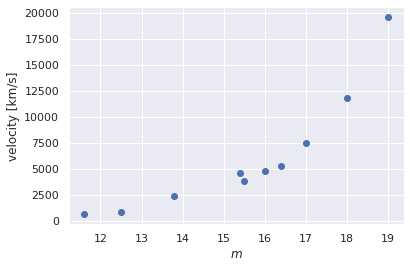

In [ ]:
plt.scatter(df['mean_m'], df['velocity'])
plt.xlabel(r'$m$')
plt.ylabel(r'velocity [km/s]')
plt.show()

### Covariance

We will calculate the covariance between these features.

In [ ]:
def cov(x,y):
  N = len(x)
  mu_x = sum(x)/N
  mu_y = sum(y)/N
  return sum((x - mu_x)*(y - mu_y))/N

cov(df['mean_m'],df['velocity'])

10565.68

This result shows that there is some kidn of (positive) covariance. however, it is not clear if the features have a linear relation between them.

### Correlation Coefficient
Now, we calculate the correlation coefficient  of these features.

In [ ]:
def corr(x,y):
  N = len(x)
  num = N*sum(x*y)- sum(x)*sum(y)
  den = np.sqrt(N*sum(x*x) - sum(x)*sum(x))*np.sqrt(N*sum(y*y) - sum(y)*sum(y))
  return num/den

corr(df['mean_m'],df['velocity'])

0.8756693926772317

This result, together with the plot above, shows that the relation is not completly linear. However, we will introduce a column in the dataframe including the logarithm of the velocity to show that it is possible to obtain a good linear behavior.

In [ ]:
df['log10_velocity'] = np.log10(df['velocity'])
df

,Name,N_measurements,velocity,mean_m,log10_velocity
0,Virgo,7,890,12.5,2.949390
1,Pegasus,5,3810,15.5,3.580925
2,Pisces,4,4630,15.4,3.665581
3,Cancer,2,4820,16.0,3.683047
4,Perseus,4,5230,16.4,3.718502
5,Coma,3,7500,17.0,3.875061
6,Ursa_Major,1,11800,18.0,4.071882
7,Leo,1,19600,19.0,4.292256
8,[No_Name],16,2350,13.8,3.371068
9,[No_Name],16,630,11.6,2.799341


In [ ]:
df.describe()

,N_measurements,velocity,mean_m,log10_velocity
count,10.000000,10.000000,10.000000,10.000000
mean,5.900000,6126.000000,15.520000,3.600705
std,5.626327,5750.565576,2.331332,0.461869
min,1.000000,630.000000,11.600000,2.799341
25%,2.250000,2715.000000,14.200000,3.423532
50%,4.000000,4725.000000,15.750000,3.674314
75%,6.500000,6932.500000,16.850000,3.835921
max,16.000000,19600.000000,19.000000,4.292256


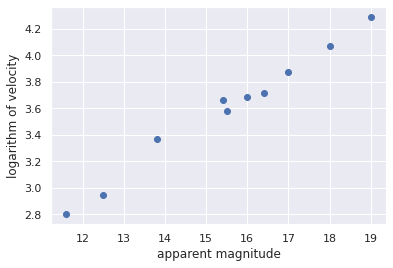

In [ ]:
plt.scatter(df['mean_m'], df['log10_velocity'])
plt.xlabel(r'apparent magnitude')
plt.ylabel(r'logarithm of velocity')
plt.show()

In [ ]:
cov(df['mean_m'],df['log10_velocity'])

0.9620255525348563

In [ ]:
corr(df['mean_m'],df['log10_velocity'])

0.9927066870715695

This result and the plot above, show that there is a linear relation between these features. Hence, we will obtain a linear fit.

### Linear Fit

Since the plot of the logarithm of the velocity vs. apparent magnitude has a linear tendence, we will create a linear fit for this data (including the possibility of having error in the y measurements).

In [ ]:
import LinearFit as lf

Since we have no information about the observational error, we use a constant value of $\sigma_i = 1$

In [ ]:
number_rows = df['log10_velocity'].count()
error_y = np.ones(number_rows)

Now we make the linear fit

In [ ]:
a_1, a_2 , sigma_a1, sigma_a2, chi2, R2 = lf.linear_fit(df['mean_m'],df['log10_velocity'],error_y)
a_1, a_2, chi2, R2

(0.5484040402255217,
 0.19666889208743046,
 0.027902852936639286,
 0.9922507256121249)

The obtained relation fits very well the observational data, with a value of $\chi ^2 = 0.028 $ and a score of $R^2 = 0.99$. The plot shows the good fit

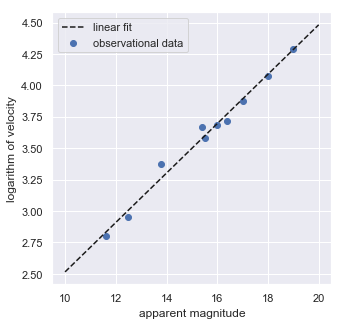

In [ ]:
m_range= np.linspace(10,20,40)
logV = a_1 + a_2*m_range

plt.figure(figsize=(5,5))
plt.scatter(df['mean_m'], df['log10_velocity'],label='observational data')
plt.plot(m_range,logV,'--k', label='linear fit')


plt.xlabel(r'apparent magnitude')
plt.ylabel(r'logarithm of velocity')
plt.legend()
plt.show()

The obtained linear model gives the relation between velocity and apparent magnitude as

$\log_{10} v = a_1 + a_2 m = 0.548 + 0.197 m$.

At this point we will assume, as Hubble and Humason did, that the coefficient of $m$ in this equation will be $0.2$, and therefore the equation becomes

$\log_{10} v = a_1 + a_2 m = 0.548 + 0.2 m$.

From the expression for the distance, we have 

$\log_{10} d = \frac{m-M+5}{5} \,  \rightarrow \, \log_{10} d = 0.2m - 0.2M + 1$

and therefore we can write

$\log_{10} \left( \frac{v}{d} \right) = \log_{10}v - \log_{10} d = a_1  - 1+ 0.2M $.

Using  the obtained value for $a_1$ and $M=-13.8$ we get

$\log_{10} \left( \frac{v}{d} \right) = -3.212$,

which gives the Hubble constant

$H_0 = \frac{v}{d} = 10^{-3.212} = 614 \times 10^{-6} \textrm{ km } \textrm{s}^{-1} \textrm{ pc}^{-1} = 614 \textrm{ km } \textrm{s}^{-1} \textrm{ Mpc}^{-1}$ 

---

### Alternative Linear Fit

We can perform another linear fit, introducing directly the distance as a feature in the dataframe,

In [ ]:
M = -13.8
df['log10_distance'] = (df['mean_m'] - M + 5.)/5.
df

,Name,N_measurements,velocity,mean_m,log10_velocity,log10_distance
0,Virgo,7,890,12.5,2.949390,6.26
1,Pegasus,5,3810,15.5,3.580925,6.86
2,Pisces,4,4630,15.4,3.665581,6.84
3,Cancer,2,4820,16.0,3.683047,6.96
4,Perseus,4,5230,16.4,3.718502,7.04
5,Coma,3,7500,17.0,3.875061,7.16
6,Ursa_Major,1,11800,18.0,4.071882,7.36
7,Leo,1,19600,19.0,4.292256,7.56
8,[No_Name],16,2350,13.8,3.371068,6.52
9,[No_Name],16,630,11.6,2.799341,6.08


The linear behavior can be seen in a plot of $\log_{10} v$ vs. $\log_{10} d$,

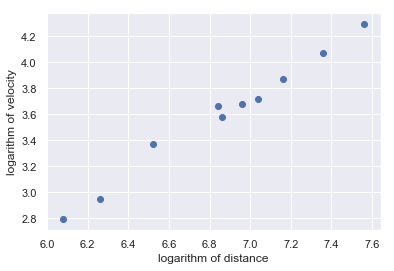

In [ ]:
plt.scatter(df['log10_distance'], df['log10_velocity'])
plt.xlabel(r'logarithm of distance')
plt.ylabel(r'logarithm of velocity')
plt.show()

Hence, we create the linear fit between these variables.

In [ ]:
number_rows = df['log10_velocity'].count()
error_y = np.ones(number_rows)

a_1, a_2 , sigma_a1, sigma_a2, chi2, R2 = lf.linear_fit(df['log10_distance'],df['log10_velocity'],error_y)
a_1, a_2, chi2, R2

(-3.1489711310180266,
 0.9833444604370973,
 0.027902852936639126,
 0.992250725612125)

One again, the fit has a value of $\chi ^2 = 0.028 $ and a score of $R^2 = 0.99$. The plot shows the good fit:

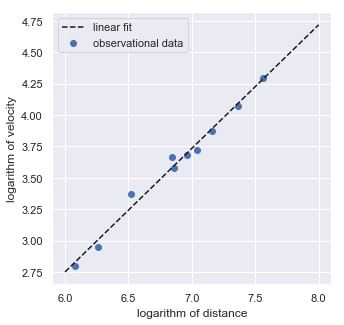

In [ ]:
distance_range= np.linspace(6,8,20)
logV = a_1 + a_2*distance_range

plt.figure(figsize=(5,5))
plt.scatter(df['log10_distance'], df['log10_velocity'],label='observational data')
plt.plot(distance_range,logV,'--k', label='linear fit')


plt.xlabel(r'logarithm of distance')
plt.ylabel(r'logarithm of velocity')
plt.legend()
plt.show()

The obtained linear model gives the relation between velocity and distance as

$\log_{10} v = a_1 + a_2 \log_{10} d = -3.15 + 0.98 \log_{10} d$.

At this point we will assume that the coefficient of $\log_{10} d$ in this equation will be approximately $1$, and therefore the equation becomes

$\log_{10} v = a_1 + a_2 m = -3.15 +\log_{10}d$.

From this expression we have 

$\log_{10} \left( \frac{v}{d} \right) = \log_{10}v - \log_{10} d = -3.15 $,

and therefore the Hubble constant is

$H_0 = \frac{v}{d} = 10^{-3.15} = 708 \times 10^{-6} \textrm{ km } \textrm{s}^{-1} \textrm{ pc}^{-1} = 708 \textrm{ km } \textrm{s}^{-1} \textrm{ Mpc}^{-1}$ 

---